In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(style='white', font_scale=1.3)


In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
pos = {
     0: np.array([-0.4703862 , -0.34489328]),
     1: np.array([ 0.40357603, -0.75529649]),
     2: np.array([-0.08569073, -0.01218594]),
     3: np.array([ 0.57099165, -0.09285646]), #np.array([ 0.57099165, -0.46346923]),
     4: np.array([0.24036975, -0.10285646]),
     5: np.array([-0.04527947, -0.81240998]),
     6: np.array([0.3388763 , 0.68574299]),
     7: np.array([-0.04654207,  1.        ]),
     8: np.array([-0.73426707,  0.30742817]),
     9: np.array([-0.27164818,  0.30222731]), 
    10: np.array([-0.6, 0.9]),
    11: np.array([-0.75, -0.7]),
}

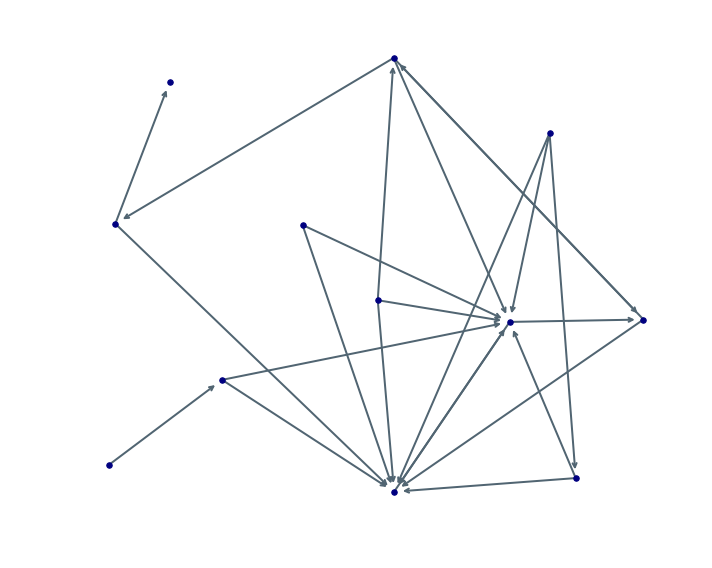

In [4]:
G2 = nx.DiGraph()
G2.add_edges_from([
    (0, 4), (0, 5), 
    (1, 4), (1, 5), 
    (2, 5), (2, 4), (2, 7), 
    (3, 5), (3, 7), 
    (4, 4), (4, 5), (4, 3), 
    (5, 5), (5, 4), 
    (6, 1), (6, 4), (6, 5), 
    (7, 8), (7, 3), (7, 7), (7, 4), 
    (8, 5), (8, 10), 
    (9, 5), (9, 4), 
    (11, 0)
])
fig, ax = plt.subplots(figsize=(10,8))

nx.draw_networkx_nodes(G2, pos, node_size=30, node_color='navy', ax=ax)
edges = nx.draw_networkx_edges(G2, pos, arrowstyle='->',
                               arrowsize=10, edge_color='xkcd:slate',
                               edge_cmap=plt.cm.Blues, width=2, ax=ax)
ax.set_axis_off()
plt.tight_layout()

In [5]:
lab_pos = {
 0: np.array([-0.5203861968022094, -0.34489328]),
 1: np.array([0.35357603138776517, -0.8052964860501227]),
 2: np.array([-0.13569073076563426, -0.06218594410604387]),
 3: np.array([0.62099165, -0.14285646]), #[0.520991645284546, -0.5134692342035163],
 4: np.array([0.29036975, -0.05285646]), #[0.2903697506759813, 0.042856461263042114],
 5: np.array([-0.09527947239492962, -0.8624099846632357]),
 6: np.array([0.28887629565447687, 0.6357429948931298]),
 7: np.array([0.003457933662384602, 1.05]), #[-0.0965420663376154, 0.95],
 8: np.array([-0.7842670732612133, 0.25742816832033305]),
 9: np.array([-0.32164818344117274, 0.25222730650611364]), 
10: np.array([-0.65, 0.95]),
11: np.array([-0.80, -0.75]),
}
nlabels = 'abcdefghijkl'
nlabels = list(nlabels)
nlabels = {n: nlabels[n] for n in G2.nodes()}

In [6]:
# 強迫用同一組 pos 所以位置要一樣
rg1 = nx.DiGraph(nx.directed_configuration_model(list(G2.in_degree(n) for n in range(12)), list(G2.out_degree(n) for n in range(12)), create_using = nx.DiGraph()))
rg2 = nx.DiGraph(nx.directed_configuration_model(list(G2.in_degree(n) for n in range(12)), list(G2.out_degree(n) for n in range(12)), create_using = nx.DiGraph()))
rg3 = nx.DiGraph(nx.directed_configuration_model(list(G2.in_degree(n) for n in range(12)), list(G2.out_degree(n) for n in range(12)), create_using = nx.DiGraph()))


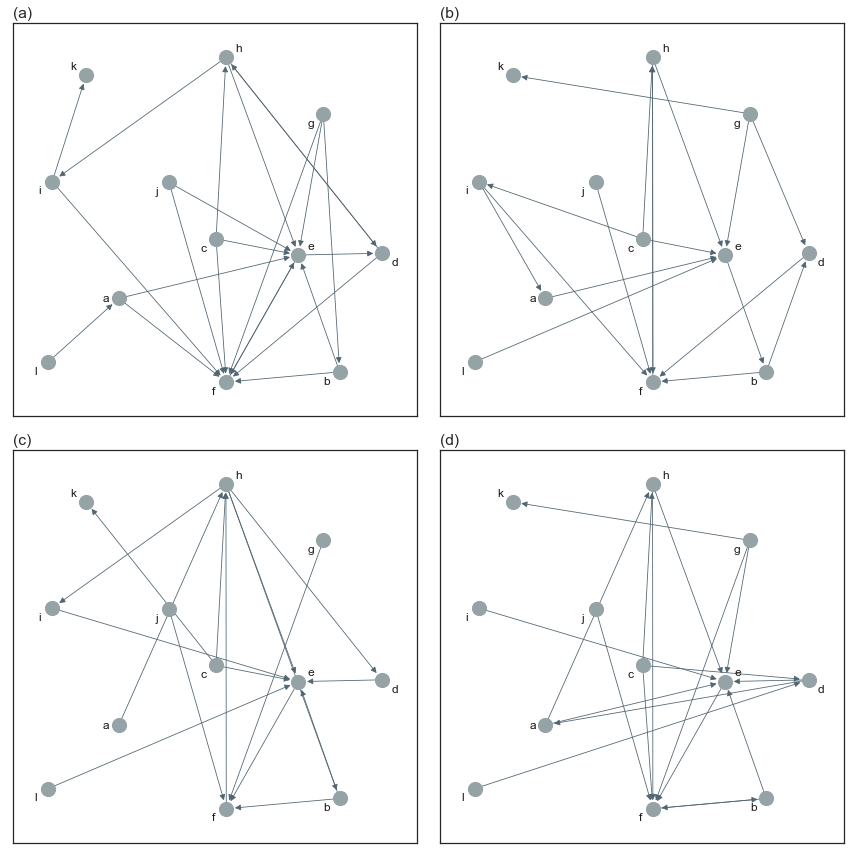

In [7]:
fig, axg = plt.subplots(2, 2, figsize=(12,12))
axs = axg.flatten()

for ax, rg in zip(axs, [G2, rg1, rg2, rg3]):
    nx.draw_networkx_edges(rg, pos, arrowstyle='-|>', arrowsize=12, 
                               edge_color='xkcd:slate', width=0.8, ax=ax)

labs = 'abcd'
i = 0
for ax in axs:
    nx.draw_networkx_nodes(G2, node_size=200, node_color='xkcd:cool gray', pos=pos, ax=ax, )
    nx.draw_networkx_labels(G2, lab_pos, labels=nlabels, ax=ax)
    ax.set_title('({})'.format(labs[i]), loc='left')
    #ax.set_axis_off()
    ax.set_xticks([])
    ax.set_yticks([])
    i+=1
plt.tight_layout()

注意 d 節點

In [15]:
pos_by_degree = {}
for a,b in zip(G2.in_degree(), G2.out_degree()):
    #print(a,b)
    ni, i = a
    no, o = b
    if not((i,o) in pos_by_degree):
        pos_by_degree[(i,o)] = [pos[ni]]
    else:
        pos_by_degree[(i,o)].append(pos[ni])
print()
for k,p in pos_by_degree.items():
    print(k,p)

()
((1, 2), [array([-0.4703862 , -0.34489328]), array([ 0.40357603, -0.75529649]), array([-0.73426707,  0.30742817])])
((0, 1), [array([-0.75, -0.7 ])])
((8, 3), [array([ 0.24036975, -0.10285646])])
((9, 2), [array([-0.04527947, -0.81240998])])
((2, 2), [array([ 0.57099165, -0.09285646])])
((1, 0), [array([-0.6,  0.9])])
((0, 3), [array([-0.08569073, -0.01218594]), array([0.3388763 , 0.68574299])])
((3, 4), [array([-0.04654207,  1.        ])])
((0, 2), [array([-0.27164818,  0.30222731])])


In [17]:
pos_r1 = {}
check = []
for a,b in zip(rg1.in_degree(), rg1.out_degree()):
    print(a,b)
    ni, i = a
    print ni
    no, o = b
    ind = check.count((i,o))
    pos_r1[ni] = pos_by_degree[(i,o)][ind]
    check.append((i,o))
print(pos_r1)

((0, 1), (0, 1))
0


KeyError: (1, 1)